# Intro

## Features

### Popularity indicators
- stargazers_count -> number of stars
- forks_count
- subscribers_count
- downloads count for 2015 and 2016
- average month downloads for last year
- downloads for last month
- downloads for last week

### Features of projects
- size
- dependencies_count
- mainteiners_count
- contributors_count
- has_tests
- has_readme
- open_issues_count

In [1]:
# Helper function
from IPython.display import Markdown, display
def printmd(string):
    '''
    helper print function that prints markdown
    '''
    display(Markdown(string))

In [82]:
# Following code just fetches features from database and creates numpy arrays from it.
import sys
import os
import numpy as np
import psycopg2

wk_dir = os.path.dirname(os.path.realpath('__file__'))
sys.path.append(
        os.path.abspath(os.path.join(wk_dir, '..')))

from source.helpers.db import execute, fetch

result = fetch((
"SELECT stargazers_count, forks_count,"
        "open_issues_count, size, subscribers_count,"
        "dependencies_count, mainteiners_count,"
        "contributors_count, has_tests, has_readme,"
        "total_downloads.downloads, average_downloads.avg,"
        "last_month_downloads.downloads,"
        "last_week_downloads.downloads "
"FROM repos AS r "
"INNER JOIN average_downloads ON r.id = average_downloads.repo_id "
"INNER JOIN total_downloads ON r.id = total_downloads.repo_id "
"INNER JOIN last_month_downloads ON r.id = last_month_downloads.repo_id "
"INNER JOIN last_week_downloads ON r.id = last_week_downloads.repo_id "
"WHERE has_readme is not Null "
"ORDER BY RANDOM();"
))


X_tmp = []
Y_tmp = []
for r in result:
    y = [r[0], r[1], r[4], r[10], r[11], r[12], r[13]]
    x = [r[2], r[3], r[5], r[6], r[7], int(r[8]), int(r[9])] 
    X_tmp.append(x)
    Y_tmp.append(y)

# X_labels and Y_labels correspond with what is in X and Y, they mark  what columns represent what values
X_labels = ["open_issues_count", "size", "dependencies_count", 
            "mainteiners_count", "contributors_count", "has_tests", "has_readme"]
Y_labels = ["stars", "forks", "subscribers", "downloads", 
            "avg_per_month", "last_month_downloads", "last_week_downloads"]
X = np.array(X_tmp, dtype=np.float64)
Y = np.array(Y_tmp, dtype=np.float64)

In [3]:
# indexes that make accessing values in X and Y more verbose

OPEN_ISSUES_COUNT = 0
SIZE = 1
DEPENDENCIES_COUNT = 2
MAINTAINERS_COUNT = 3
CONTRIBUTORS_COUNT = 4
HAS_TESTS = 5
HAS_README = 6

STARS = 0
FORKS = 1
SUBSCRIBERS = 2
TOTAL_DOWNLOADS = 3
AVERAGE_PER_MONTH_DOWNLOADS = 4
LAST_MONTH_DOWNLOADS = 5
LAST_WEEK_DOWNLOADS = 6

In [34]:
# here we take a look at how many packages have tests and how many of them have readme file

column_sum = np.sum(X, axis=0)
has_tests_total = column_sum[HAS_TESTS]
has_readme_total = column_sum[HAS_README]
total = X.shape[0]
print("Packages that have tests: {} / {}".format(has_tests_total, total))
print("Packages that have readme file: {} / {}".format(has_readme_total, total))
# Numer of repos that have test 
# and number of repos that have readme

Packages that have tests: 106661.0 / 139488
Packages that have readme file: 126201.0 / 139488


In [5]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.0f' % x)
dataframe = pd.DataFrame.from_records(data=np.concatenate([X, Y], axis=1), columns=X_labels + Y_labels)
file_handle = open('data.csv', 'w')
dataframe.to_csv(path_or_buf=file_handle)
dataframe.describe()
# basic analysis on all properties, features and popularity indicators.

,open_issues_count,size,dependencies_count,mainteiners_count,contributors_count,has_tests,has_readme,stars,forks,subscribers,downloads,avg_per_month,last_month_downloads,last_week_downloads
count,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488,139488
mean,2,974,3,1,0,1,1,44,7,5,397430,20478,36701,9966
std,19,10327,4,1,5,0,0,591,155,46,6422534,323927,556648,152214
min,0,0,0,0,0,0,0,0,0,0,31,10,3,1
25%,0,20,0,1,0,1,1,0,0,1,353,32,17,4
50%,0,128,1,1,0,1,1,1,0,1,911,73,42,10
75%,1,220,3,1,0,1,1,5,1,2,2806,203,162,40
max,2417,1413899,130,66,587,1,1,98280,43605,6318,396933770,19846688,36851932,11355842


### Open issues count

Quartiles suggest that most of the repos have no issues opened at all.


### Size

Size of repos can vary alot since min is 0 and ma is 1413899. 
However quartiles that size of most of the repos is in lower values, under 128.


### Dependencies count

Most of the projects keep the dependencies low.


### Maintainers count

Most of the projects have one maintainer.


### Contributors count

Most of the projects have no contributors.


### Has tests / has readme 

These are discussed above.


### Stars

Most of the projects have less than 5 stars.

### Forks

Most of the projects have 1 or less than 1 fork.

### Subsribers

Most of the projects have less than 2 subscribers


### Downloads

All numbers of downloads are distributed unevenly.



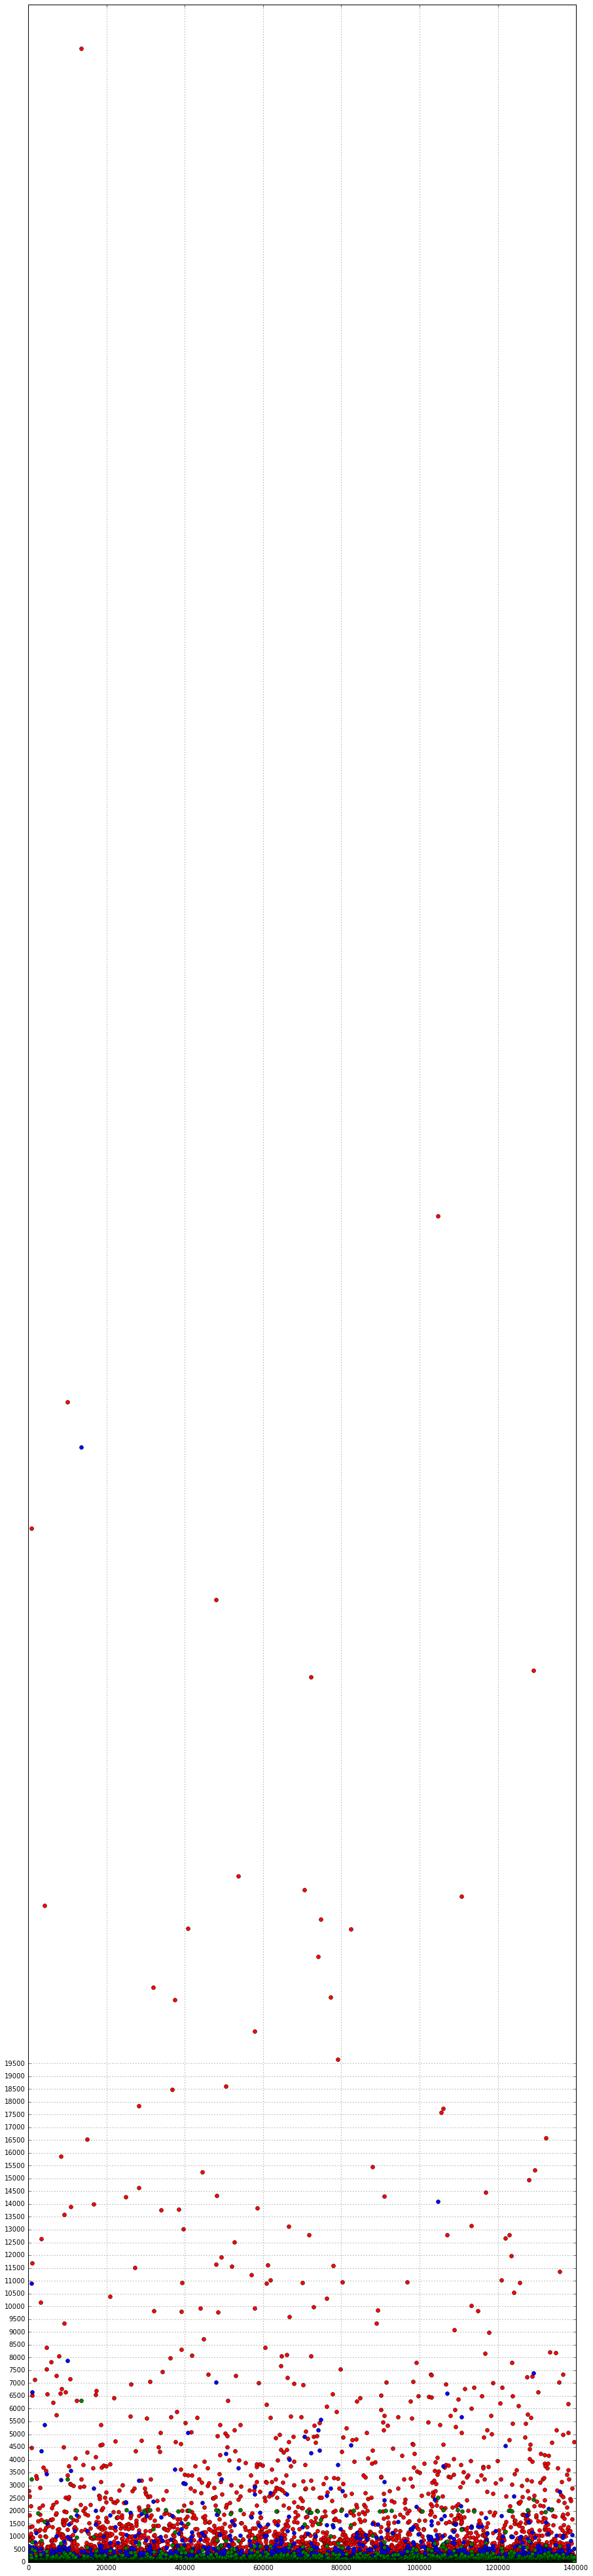

In [6]:
# the following plot helps to see distribution of value
# we made the graph very high so the distribution can be viewed better

%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 70))
plt.plot(Y[:, STARS], 'ro')
plt.plot(Y[:, FORKS], 'bo')
plt.plot(Y[:, SUBSCRIBERS], 'go')
plt.yticks( np.arange(0, 20000, 500.0))
plt.grid()
plt.show()

In the graph above we can see that red dots (number of stars) stand out and differentiate the repos the most. Even though most of the repos have very low stars count.

In [51]:
# helper functions
from scipy import stats

def print_mean(X):
    '''
    Calculates and prints mean.
    '''
    printmd("**Mean**: {}".format(np.mean(X)))
    
def print_mode(X):
    '''
    Calculates and prints mode.
    '''
    printmd("**Mode**: {}".format(stats.mode(X)))

def print_analysis(X):
    '''
    Prints various properties of X.
    Mean, mode.
    '''
    print_mean(X)
    print_mode(X)

# Analyzing more feature and target properties

In [48]:
# analyzing popularity features

printmd("### Stars")
print_analysis(Y[:, STARS])

printmd("### Forks")
print_analysis(Y[:, FORKS])

printmd("### Subribers")
print_analysis(Y[:, SUBSCRIBERS])

printmd("### Downloads")
print_analysis(Y[:, TOTAL_DOWNLOADS])

printmd("### Avg downloads")
print_analysis(Y[:, AVERAGE_PER_MONTH_DOWNLOADS])

printmd("### Last month downloads")
print_analysis(Y[:, LAST_MONTH_DOWNLOADS])

printmd("### Last week downloads")
print_analysis(Y[:, LAST_WEEK_DOWNLOADS])







### Stars

**Mean**: 0.5761714269327828

**Mode**: ModeResult(mode=array([ 1.]), count=array([80369]))

### Forks

**Mean**: 1.0

**Mode**: ModeResult(mode=array([ 1.]), count=array([139488]))

### Subribers

**Mean**: 0.9519098417068135

**Mode**: ModeResult(mode=array([ 1.]), count=array([132780]))

### Downloads

**Mean**: 0.5000501835283322

**Mode**: ModeResult(mode=array([ 1.]), count=array([69751]))

### Avg downloads

**Mean**: 0.5003226083964212

**Mode**: ModeResult(mode=array([ 1.]), count=array([69789]))

### Last month downloads

**Mean**: 0.5063374627208075

**Mode**: ModeResult(mode=array([ 1.]), count=array([70628]))

### Last week downloads

**Mean**: 0.5184675384262446

**Mode**: ModeResult(mode=array([ 1.]), count=array([72320]))

In [50]:
# analyzing project features

printmd("### Open issues count")
print_analysis(X[:, OPEN_ISSUES_COUNT])

printmd("### Size")
print_analysis(X[:, SIZE])

printmd("### Dependencies")
print_analysis(X[:, DEPENDENCIES_COUNT])

printmd("### Mainteiners")
print_analysis(X[:, MAINTAINERS_COUNT])

printmd("### Contributors")
print_analysis(X[:, CONTRIBUTORS_COUNT])

### Open issues count

**Mean**: 2.059259577884836

**Mode**: ModeResult(mode=array([ 0.]), count=array([100342]))

### Size

**Mean**: 973.5284899059417

**Mode**: ModeResult(mode=array([ 3.]), count=array([2730]))

### Dependencies

**Mean**: 2.676452454691443

**Mode**: ModeResult(mode=array([ 0.]), count=array([43683]))

### Mainteiners

**Mean**: 1.175893266804313

**Mode**: ModeResult(mode=array([ 1.]), count=array([127768]))

### Contributors

**Mean**: 0.2520933700389998

**Mode**: ModeResult(mode=array([ 0.]), count=array([129569]))

# Visualizing dataset properties

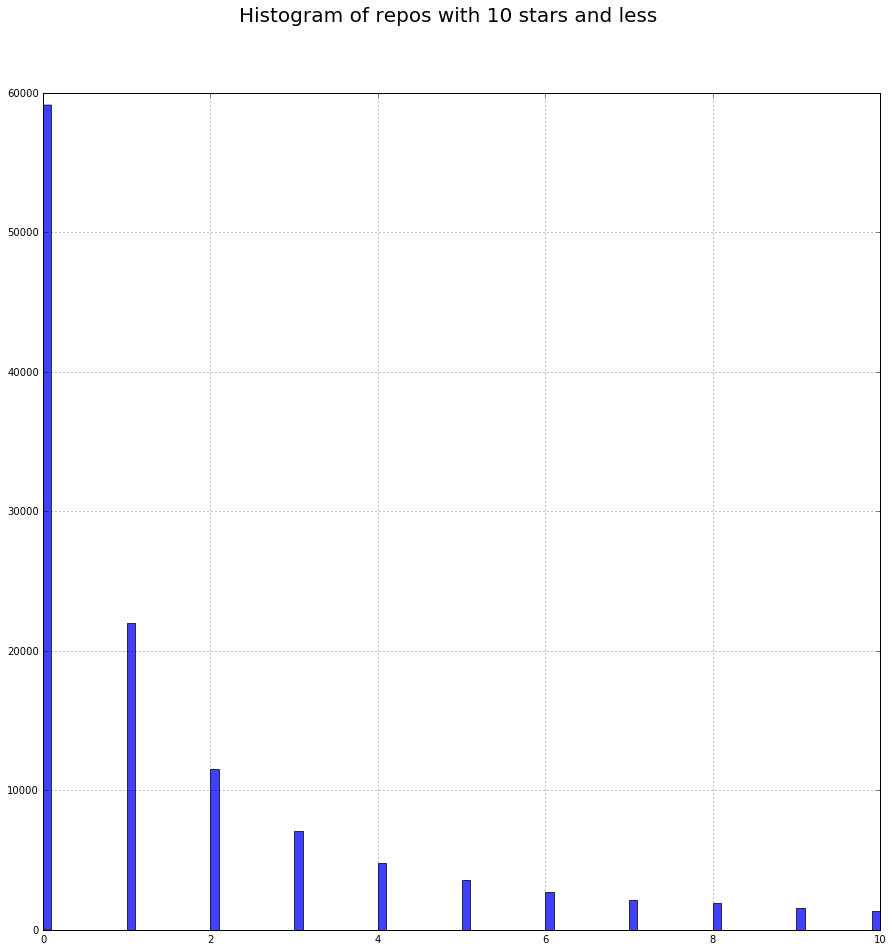

In [10]:

import matplotlib.mlab as mlab

mu, sigma = 100, 15
# the histogram of the data
plt.figure(figsize=(15, 15)).suptitle('Histogram of repos with 10 stars and less', size=20)
n, bins, patches = plt.hist(Y[:, 0], 100, range=(0, 10), normed=False, alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.grid(True)

plt.show()

This plot shows histogram for repositories with 10 and less stars, most of the repositories are in this range and overwhelming majory has 0 stars.

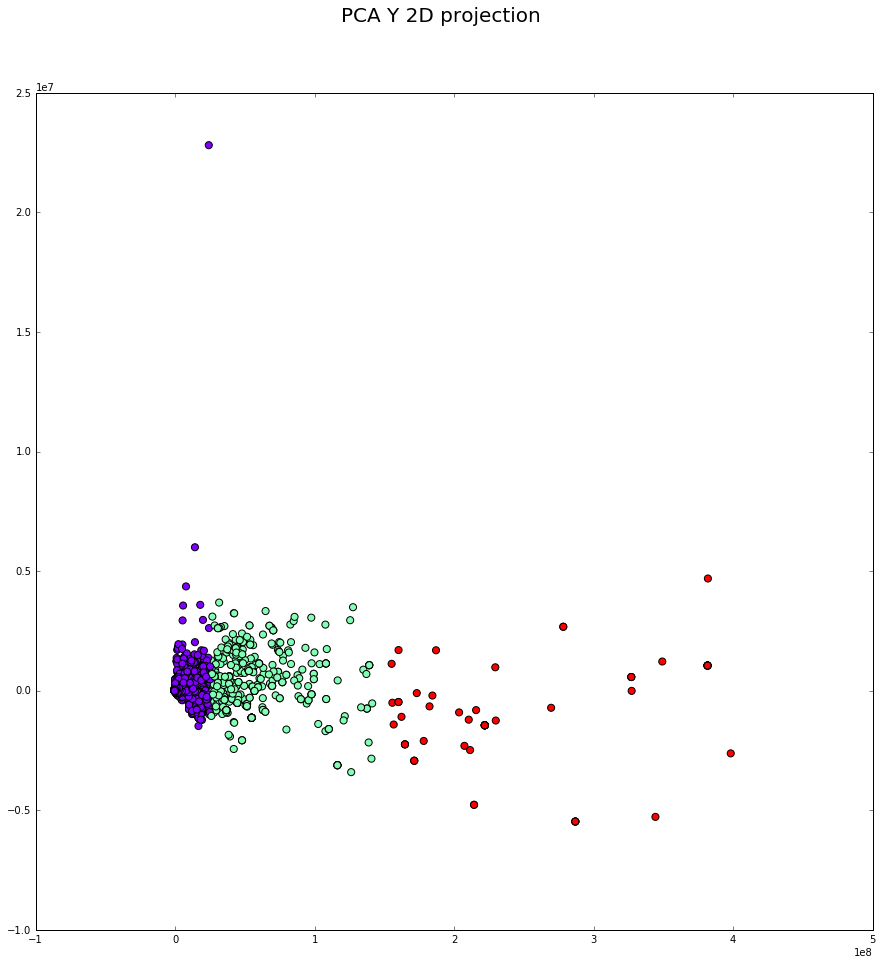

In [11]:
# We cluster popularity features into 3 groups
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Y)
transformed = pca.transform(Y)

est = KMeans(3)
est.fit(transformed)

y_kmeans = est.predict(transformed)
plt.figure(figsize=(15, 15)).suptitle('PCA Y 2D projection', size=20)
plt.scatter(transformed[:, 0], transformed[:, 1], c=y_kmeans, s=50, cmap='rainbow');

First we apply principal component analysis to popularity indicators and afterwards we cluster the dataset using `kMeans`.

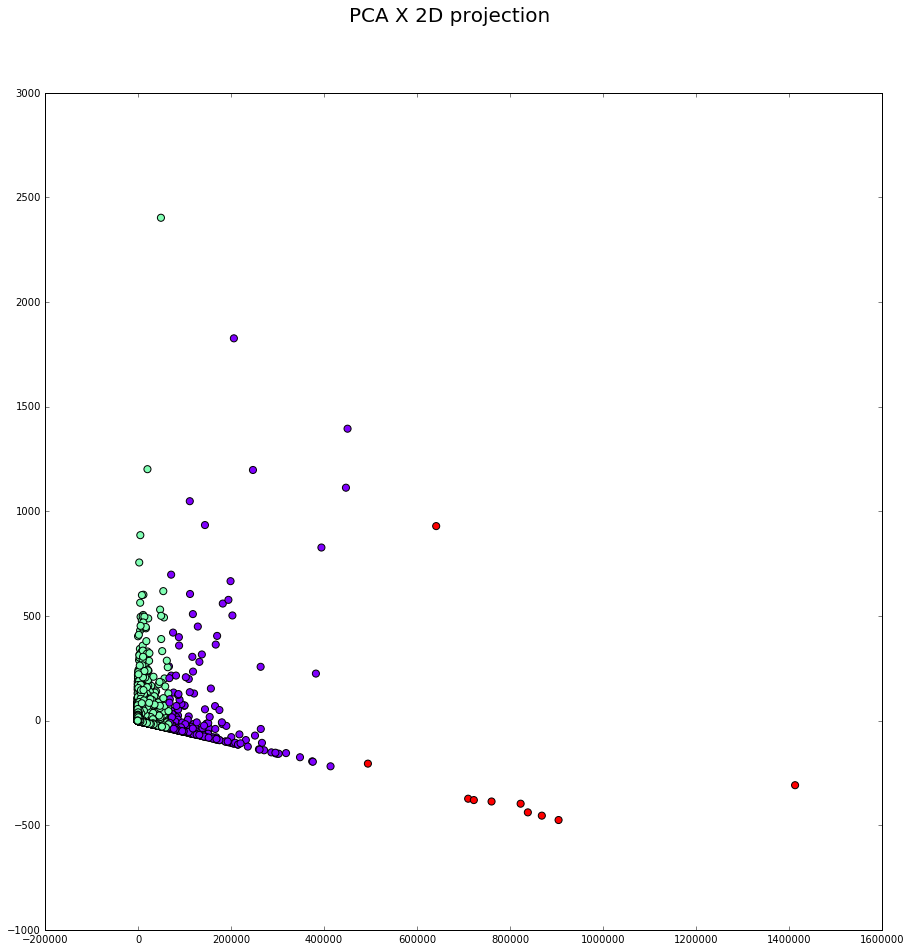

In [52]:
# We cluster project features into 3 groups
est = KMeans(3)  # 4 clusters
est.fit(X)

x_kmeans = est.predict(X)


pca = PCA(n_components=2)
pca.fit(X)
transformed = pca.transform(X)

plt.figure(figsize=(15, 7))
plt.figure(figsize=(15, 15)).suptitle('PCA X 2D projection', size=20)
plt.scatter(transformed[:, 0], transformed[:, 1], c=x_kmeans, s=50, cmap='rainbow');

First we apply principal component analysis to repos features and afterwards we cluster the dataset using `kMeans`.

# Correlations

We try to find whether any of the features are in correlation. Using Pearson correlation coefficient/

### First are popularity indicators

In [55]:
# We look for correlations between project features.
from sklearn import preprocessing
from scipy.stats.stats import pearsonr   

for i in range(0, Y.shape[1]):
    for j in range(i + 1, Y.shape[1]):
        a = preprocessing.scale(Y[:, i])
        b = preprocessing.scale(Y[:, j])
        printmd("**{}** <--> **{}**".format(Y_labels[i], Y_labels[j]))
        print("%.2f%%" % pearsonr(a,b)[0])

**stars** <--> **forks**

nan%


**stars** <--> **subscribers**

0.07%


**stars** <--> **downloads**

0.27%


**stars** <--> **avg_per_month**

0.23%


**stars** <--> **last_month_downloads**

0.23%


**stars** <--> **last_week_downloads**

0.25%


**forks** <--> **subscribers**

nan%


**forks** <--> **downloads**

nan%


**forks** <--> **avg_per_month**

nan%


**forks** <--> **last_month_downloads**

nan%


**forks** <--> **last_week_downloads**

nan%


**subscribers** <--> **downloads**

0.05%


**subscribers** <--> **avg_per_month**

0.05%


**subscribers** <--> **last_month_downloads**

0.05%


**subscribers** <--> **last_week_downloads**

0.04%


**downloads** <--> **avg_per_month**

0.73%


**downloads** <--> **last_month_downloads**

0.69%


**downloads** <--> **last_week_downloads**

0.70%


**avg_per_month** <--> **last_month_downloads**

0.79%


**avg_per_month** <--> **last_week_downloads**

0.57%


**last_month_downloads** <--> **last_week_downloads**

0.65%


Stars, forks and stars, subscribers correlate quite well. However to my suprise stars and number of downloads does not correlate at all.

Different types of downloads have high correlation.

### Now we try repos features

In [56]:

for i in range(0, X.shape[1]):
    for j in range(i + 1, X.shape[1]):
        a = preprocessing.scale(X[:, i])
        b = preprocessing.scale(X[:, j])
        printmd("**{}** <--> **{}**".format(X_labels[i], X_labels[j]))
        print("%.2f%%" % pearsonr(a,b)[0])

**open_issues_count** <--> **size**

0.29%


**open_issues_count** <--> **dependencies_count**

0.10%


**open_issues_count** <--> **mainteiners_count**

0.07%


**open_issues_count** <--> **contributors_count**

0.10%


**open_issues_count** <--> **has_tests**

0.00%


**open_issues_count** <--> **has_readme**

0.01%


**size** <--> **dependencies_count**

0.05%


**size** <--> **mainteiners_count**

0.03%


**size** <--> **contributors_count**

0.01%


**size** <--> **has_tests**

-0.03%


**size** <--> **has_readme**

0.00%


**dependencies_count** <--> **mainteiners_count**

0.10%


**dependencies_count** <--> **contributors_count**

0.18%


**dependencies_count** <--> **has_tests**

0.02%


**dependencies_count** <--> **has_readme**

0.06%


**mainteiners_count** <--> **contributors_count**

0.05%


**mainteiners_count** <--> **has_tests**

0.03%


**mainteiners_count** <--> **has_readme**

0.05%


**contributors_count** <--> **has_tests**

0.01%


**contributors_count** <--> **has_readme**

0.01%


**has_tests** <--> **has_readme**

0.15%


There is only one small correlation between size of the project and number of opened issues.


### Now we try correlations between features and popularity indicators.

In [58]:
# We look for correlations between project features and popularity indicators. 
for i in range(0, X.shape[1]):
    for j in range(0, Y.shape[1]):
        a = preprocessing.scale(X[:, i])
        b = preprocessing.scale(Y[:, j])
        printmd("**{}** <--> **{}**".format(X_labels[i], Y_labels[j]))
        print("%.2f%%" % pearsonr(a,b)[0])

**open_issues_count** <--> **stars**

0.08%


**open_issues_count** <--> **forks**

nan%


**open_issues_count** <--> **subscribers**

0.02%


**open_issues_count** <--> **downloads**

0.07%


**open_issues_count** <--> **avg_per_month**

0.07%


**open_issues_count** <--> **last_month_downloads**

0.07%


**open_issues_count** <--> **last_week_downloads**

0.07%


**size** <--> **stars**

0.04%


**size** <--> **forks**

nan%


**size** <--> **subscribers**

0.01%


**size** <--> **downloads**

0.04%


**size** <--> **avg_per_month**

0.03%


**size** <--> **last_month_downloads**

0.03%


**size** <--> **last_week_downloads**

0.03%


**dependencies_count** <--> **stars**

0.07%


**dependencies_count** <--> **forks**

nan%


**dependencies_count** <--> **subscribers**

0.02%


**dependencies_count** <--> **downloads**

0.13%


**dependencies_count** <--> **avg_per_month**

0.14%


**dependencies_count** <--> **last_month_downloads**

0.13%


**dependencies_count** <--> **last_week_downloads**

0.08%


**mainteiners_count** <--> **stars**

0.06%


**mainteiners_count** <--> **forks**

nan%


**mainteiners_count** <--> **subscribers**

0.02%


**mainteiners_count** <--> **downloads**

0.12%


**mainteiners_count** <--> **avg_per_month**

0.12%


**mainteiners_count** <--> **last_month_downloads**

0.12%


**mainteiners_count** <--> **last_week_downloads**

0.10%


**contributors_count** <--> **stars**

0.01%


**contributors_count** <--> **forks**

nan%


**contributors_count** <--> **subscribers**

0.00%


**contributors_count** <--> **downloads**

0.03%


**contributors_count** <--> **avg_per_month**

0.03%


**contributors_count** <--> **last_month_downloads**

0.03%


**contributors_count** <--> **last_week_downloads**

0.03%


**has_tests** <--> **stars**

-0.00%


**has_tests** <--> **forks**

nan%


**has_tests** <--> **subscribers**

0.00%


**has_tests** <--> **downloads**

0.00%


**has_tests** <--> **avg_per_month**

0.03%


**has_tests** <--> **last_month_downloads**

0.03%


**has_tests** <--> **last_week_downloads**

0.00%


**has_readme** <--> **stars**

-0.07%


**has_readme** <--> **forks**

nan%


**has_readme** <--> **subscribers**

0.04%


**has_readme** <--> **downloads**

-0.08%


**has_readme** <--> **avg_per_month**

0.02%


**has_readme** <--> **last_month_downloads**

0.04%


**has_readme** <--> **last_week_downloads**

-0.10%


# Applying MDS to find clusters

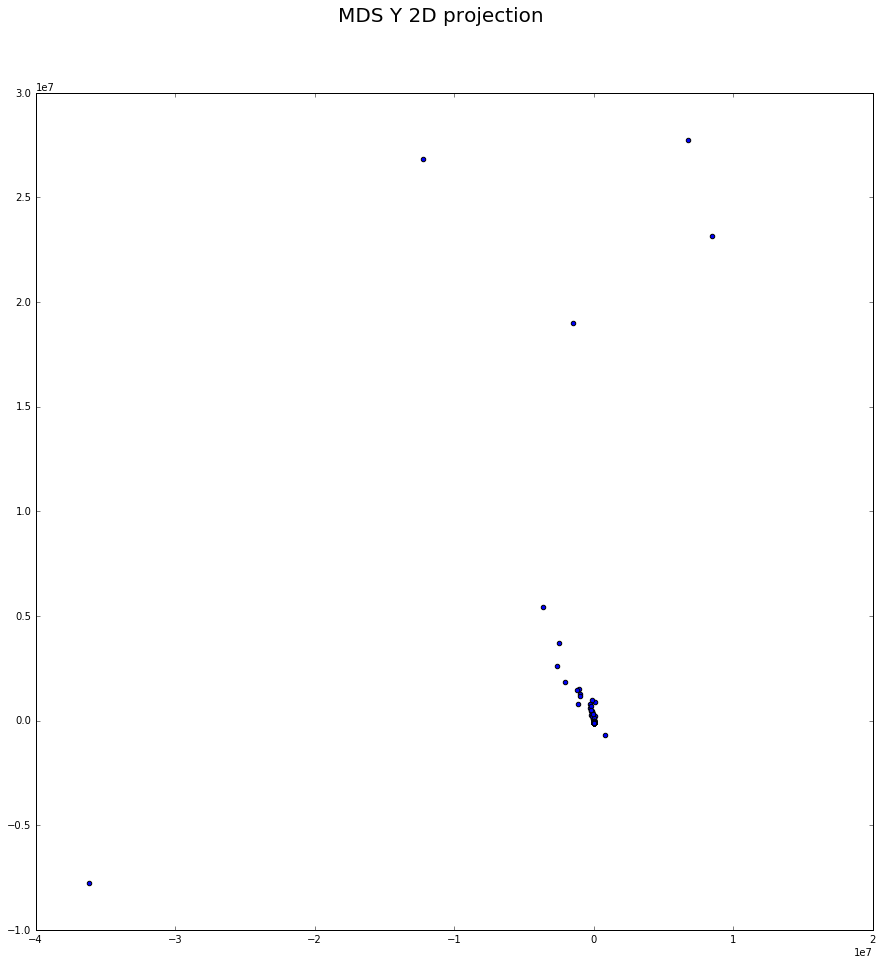

In [16]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, metric=True, dissimilarity='euclidean', random_state=3)
Y_mds = mds.fit_transform(Y[:1000])

plt.figure(figsize=(15, 15)).suptitle('MDS Y 2D projection', size=20)
plt.subplot(111)
plt.scatter(Y_mds[0:,0], Y_mds[0:,1])

plt.show()

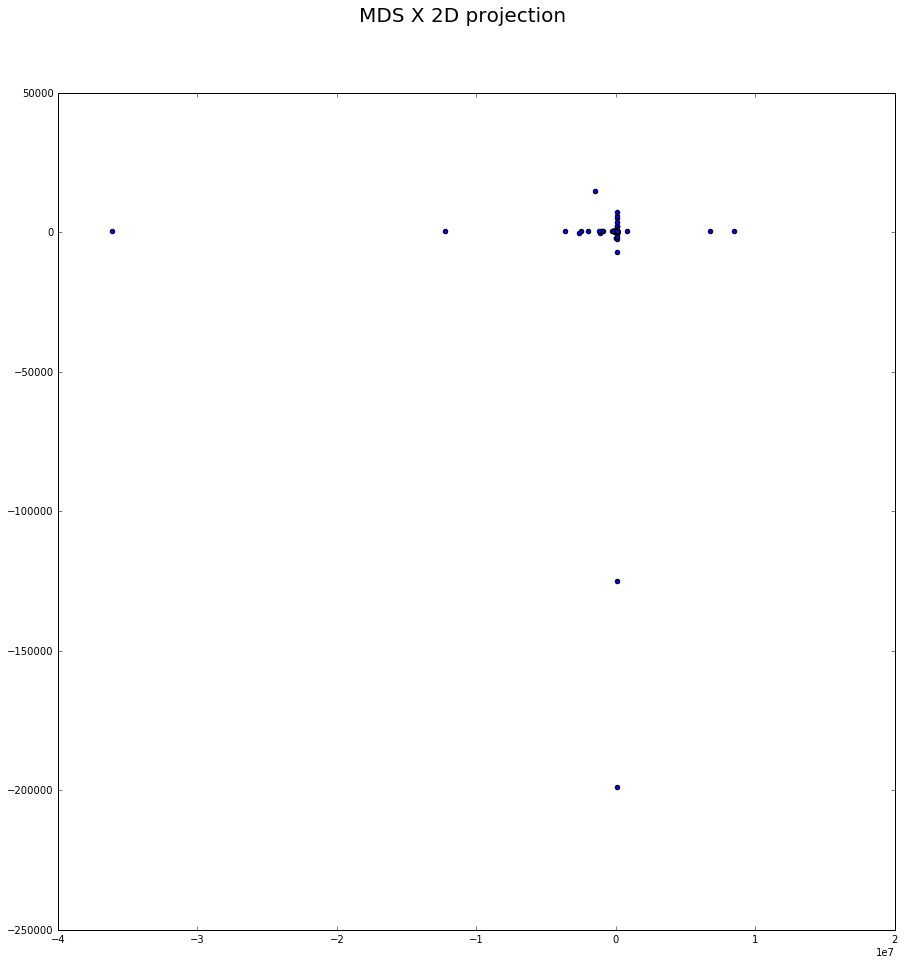

In [17]:
mds = MDS(n_components=2, metric=True, dissimilarity='euclidean', random_state=3)
X_mds = mds.fit_transform(X[:1000])

plt.figure(figsize=(15, 15)).suptitle('MDS X 2D projection', size=20)
plt.subplot(111)

plt.scatter(Y_mds[0:,0], X_mds[0:,1])

plt.show()

# Graphs that show distribution of popularity indicators

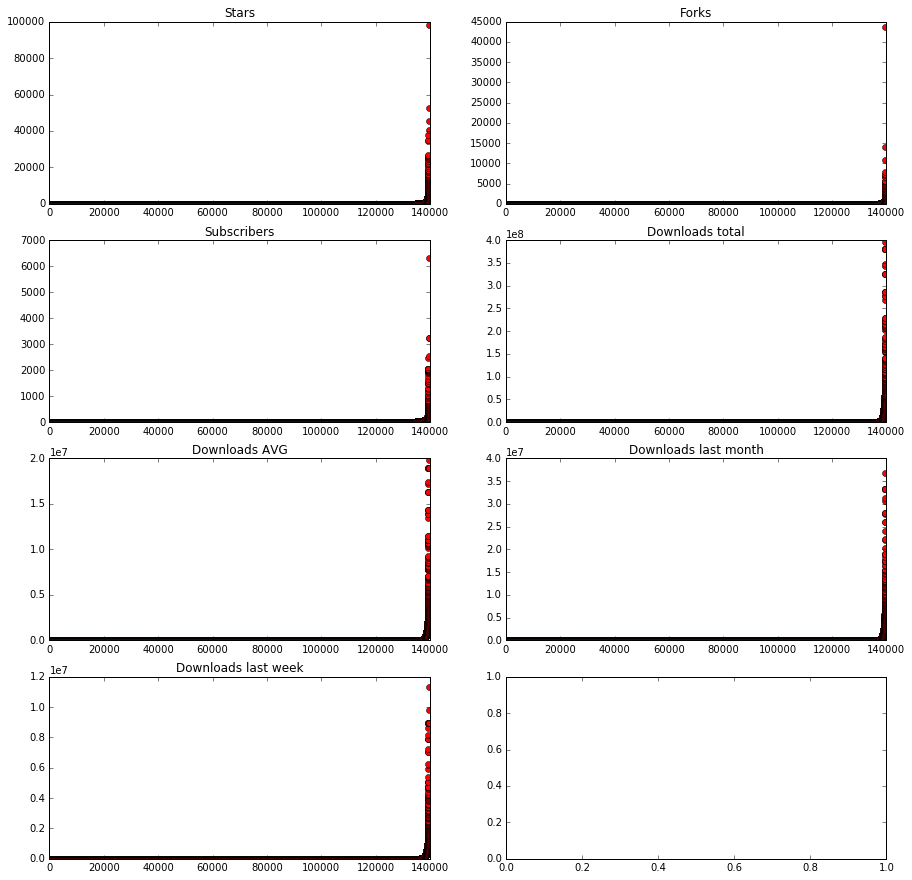

In [18]:

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))




axes[0, 0].plot(np.sort(Y[:, STARS]), 'ro')
axes[0, 0].set_title('Stars')

axes[0, 1].plot(np.sort(Y[:, FORKS]), 'ro')
axes[0, 1].set_title('Forks')

axes[1, 0].plot(np.sort(Y[:, SUBSCRIBERS]), 'ro')
axes[1, 0].set_title('Subscribers')

axes[1, 1].plot(np.sort(Y[:, TOTAL_DOWNLOADS]), 'ro')
axes[1, 1].set_title('Downloads total')

axes[2, 0].plot(np.sort(Y[:, AVERAGE_PER_MONTH_DOWNLOADS]), 'ro')
axes[2, 0].set_title('Downloads AVG')

axes[2, 1].plot(np.sort(Y[:, LAST_MONTH_DOWNLOADS]), 'ro')
axes[2, 1].set_title('Downloads last month')

axes[3, 0].plot(np.sort(Y[:, LAST_WEEK_DOWNLOADS]), 'ro')
axes[3, 0].set_title('Downloads last week')


plt.show()




Distribution of popularity indicators is very imbalanced, either the package is not popular at all or it grows really fast.

# Predictions - regresson

First we will take number of downloads as feature we wish to predict and use various sklearn built in models.

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score, median_absolute_error

X_scaled = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y[:, TOTAL_DOWNLOADS])
def test_model(model):    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Mean: ", mean_squared_error(y_test, y_pred))
    print("Variance", explained_variance_score(y_test, y_pred))
    print("Median", median_absolute_error(y_test, y_pred))
    
    

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest

randomForestRegressor = RandomForestRegressor(1)
test_model(randomForestRegressor)



Mean:  7.83047887499e+13
Variance -0.282539394223
Median 3640.03703704


In [21]:
from sklearn import linear_model
# Linear regression
clf = linear_model.LinearRegression()
test_model(randomForestRegressor)

Mean:  8.92338598014e+13
Variance -0.461613277338
Median 3658.21428571


In [22]:
# Ridge regression
clf = linear_model.Ridge (alpha = .5)
test_model(randomForestRegressor)

Mean:  9.70284821762e+13
Variance -0.589320763237
Median 3692.0


In [23]:
clf = linear_model.Lasso(alpha = 0.1)
test_model(randomForestRegressor)

Mean:  1.08168876011e+14
Variance -0.771792110236
Median 3451.42307692


Results have low mean square error because most of the packages have low total downloads. However median error is high.

# KMeans on number of downloads

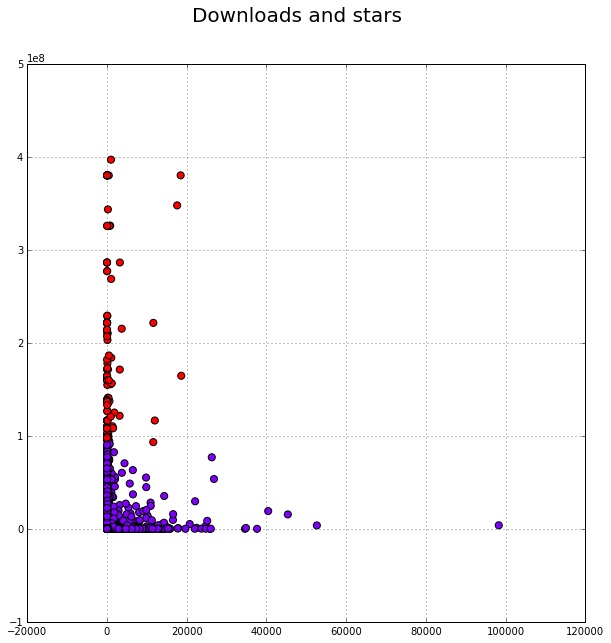

In [26]:
from sklearn.cluster import KMeans
est = KMeans(2)
est.fit(Y[:, [0, TOTAL_DOWNLOADS]])
y_kmeans = est.predict(Y[:, [0, TOTAL_DOWNLOADS]])

plt.figure(figsize=(10, 10)).suptitle('Downloads and stars', size=20)
plt.ylabel = "Downloads"
plt.xlabel = "Stars"
plt.scatter(Y[:, STARS], Y[:, TOTAL_DOWNLOADS], c=y_kmeans, s=50, cmap='rainbow');

plt.grid()
plt.show()

# Classification

splitting repos into two classes based on percentile of target feature

In [71]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score


def pipeline_with_classifier(classifier):
    estimators = []
    estimators.append(('standardize', sklearn.preprocessing.StandardScaler(copy=True)))
    estimators.append(('forest', classifier))
    pipeline = Pipeline(estimators)

    return pipeline

seed = 7
np.random.seed(seed)

kfold = sklearn.cross_validation.KFold(n=len(X), n_folds=10, random_state=seed)

classifiers = [
    ('RandomForestClassifier', RandomForestClassifier()),
    ('KNN with uniform weights', KNeighborsClassifier()),
    ('KNN with distance weights', KNeighborsClassifier(weights='distance')),
    ('Ada boost classifier', sklearn.ensemble.AdaBoostClassifier()),
]



In [32]:
def test_target_binary_split(index):
    Y_target = np.copy(Y[:, index])
    half = np.percentile(Y_target, 50)
    printmd("**Half is splitted by value**: {}".format(half))

    sum = 0
    for i, e in enumerate(Y_target):
        if e >= half:
            sum += 1
            Y_target[i] = 1
        else:
            Y_target[i] = 0

    print('there are two classes: good with {} memebers and bad with {} members'.format(sum, Y.shape[0] - sum))
    print("Classes ratio: %.2f%%" % (sum / Y.shape[0] * 100))

    for clf in classifiers:
        printmd('## Calculating - {}'.format(clf[0]))
        pipeline = pipeline_with_classifier(clf[1])
        results = sklearn.cross_validation.cross_val_score(pipeline, X, Y_target, cv=kfold)
        printmd("Accuracy: %.2f%%" % (results.mean() * 100))

        
for i, e in enumerate(Y_labels):
    printmd("# Using {} as target".format(e))
    test_target_binary_split(i)


# Using stars as target

**Half is splitted by value**: 1.0

there are two classes: good with 80369 memebers and bad with 59119 members
Classes ratio: 57.62%


## Calculating - RandomForestClassifier

Accuracy: 63.64%

## Calculating - KNN with uniform weights

Accuracy: 62.81%

## Calculating - KNN with distance weights

Accuracy: 61.67%

## Calculating - Ada boost classifier

Accuracy: 65.78%

# Using forks as target

**Half is splitted by value**: 1.0

there are two classes: good with 139488 memebers and bad with 0 members
Classes ratio: 100.00%


## Calculating - RandomForestClassifier

Accuracy: 100.00%

## Calculating - KNN with uniform weights

Accuracy: 100.00%

## Calculating - KNN with distance weights

Accuracy: 100.00%

## Calculating - Ada boost classifier

Accuracy: 100.00%

# Using subscribers as target

**Half is splitted by value**: 1.0

there are two classes: good with 132780 memebers and bad with 6708 members
Classes ratio: 95.19%


## Calculating - RandomForestClassifier

Accuracy: 94.45%

## Calculating - KNN with uniform weights

Accuracy: 95.11%

## Calculating - KNN with distance weights

Accuracy: 94.25%

## Calculating - Ada boost classifier

Accuracy: 95.19%

# Using downloads as target

**Half is splitted by value**: 1.0

there are two classes: good with 69751 memebers and bad with 69737 members
Classes ratio: 50.01%


## Calculating - RandomForestClassifier

Accuracy: 65.46%

## Calculating - KNN with uniform weights

Accuracy: 65.00%

## Calculating - KNN with distance weights

Accuracy: 63.96%

## Calculating - Ada boost classifier

Accuracy: 68.43%

# Using avg_per_month as target

**Half is splitted by value**: 1.0

there are two classes: good with 69789 memebers and bad with 69699 members
Classes ratio: 50.03%


## Calculating - RandomForestClassifier

Accuracy: 64.51%

## Calculating - KNN with uniform weights

Accuracy: 64.14%

## Calculating - KNN with distance weights

Accuracy: 63.18%

## Calculating - Ada boost classifier

Accuracy: 67.59%

# Using last_month_downloads as target

**Half is splitted by value**: 1.0

there are two classes: good with 70628 memebers and bad with 68860 members
Classes ratio: 50.63%


## Calculating - RandomForestClassifier

Accuracy: 63.83%

## Calculating - KNN with uniform weights

Accuracy: 63.43%

## Calculating - KNN with distance weights

Accuracy: 62.37%

## Calculating - Ada boost classifier

Accuracy: 66.80%

# Using last_week_downloads as target

**Half is splitted by value**: 1.0

there are two classes: good with 72320 memebers and bad with 67168 members
Classes ratio: 51.85%


## Calculating - RandomForestClassifier

Accuracy: 63.11%

## Calculating - KNN with uniform weights

Accuracy: 62.23%

## Calculating - KNN with distance weights

Accuracy: 61.06%

## Calculating - Ada boost classifier

Accuracy: 66.26%

### Splitting the repos into 4 classes based on percentile

In [33]:
def test_target_quaternary_split(index):
    Y_target = np.copy(Y[:, index])
    one_fourth = np.percentile(Y_target, 25)
    one_half = np.percentile(Y_target, 50)
    three_forths = np.percentile(Y_target, 75)

    print("1/4: {}, 1/2: {}, 3/4: {}".format(one_fourth, one_half, three_forths))
    sum = [0,0,0,0]
    for i, e in enumerate(Y_target):
        if e >= three_forths:
            e = 3
            sum[3] += 1
            continue

        if e > one_half:
            e = 2
            sum[2] += 1
            continue

        if e > one_fourth:
            e = 1
            sum[1] += 1
            continue


        e = 0
        sum[0] += 1

    
    print("Classes 1 ratio: %.2f%%" % (sum[0] / Y.shape[0] * 100))
    print("Classes 2 ratio: %.2f%%" % (sum[1] / Y.shape[0] * 100))
    print("Classes 3 ratio: %.2f%%" % (sum[2] / Y.shape[0] * 100))
    print("Classes 4 ratio: %.2f%%" % (sum[3] / Y.shape[0] * 100))

    for clf in classifiers:
        printmd('## Calculating - {}'.format(clf[0]))
        pipeline = pipeline_with_classifier(clf[1])
        results = sklearn.cross_validation.cross_val_score(pipeline, X, Y_target, cv=kfold)
        printmd("Accuracy: %.2f%%" % (results.mean() * 100))


for i, e in enumerate(Y_labels):
    printmd("# Using {} as target".format(e))
    test_target_quaternary_split(i)

# Using stars as target

1/4: 0.0, 1/2: 1.0, 3/4: 1.0
Classes 1 ratio: 42.38%
Classes 2 ratio: 0.00%
Classes 3 ratio: 0.00%
Classes 4 ratio: 57.62%


## Calculating - RandomForestClassifier

Accuracy: 63.76%

## Calculating - KNN with uniform weights

Accuracy: 62.81%

## Calculating - KNN with distance weights

Accuracy: 61.67%

## Calculating - Ada boost classifier

Accuracy: 65.78%

# Using forks as target

1/4: 1.0, 1/2: 1.0, 3/4: 1.0
Classes 1 ratio: 0.00%
Classes 2 ratio: 0.00%
Classes 3 ratio: 0.00%
Classes 4 ratio: 100.00%


## Calculating - RandomForestClassifier

Accuracy: 100.00%

## Calculating - KNN with uniform weights

Accuracy: 100.00%

## Calculating - KNN with distance weights

Accuracy: 100.00%

## Calculating - Ada boost classifier

Accuracy: 100.00%

# Using subscribers as target

1/4: 1.0, 1/2: 1.0, 3/4: 1.0
Classes 1 ratio: 4.81%
Classes 2 ratio: 0.00%
Classes 3 ratio: 0.00%
Classes 4 ratio: 95.19%


## Calculating - RandomForestClassifier

Accuracy: 94.44%

## Calculating - KNN with uniform weights

Accuracy: 95.11%

## Calculating - KNN with distance weights

Accuracy: 94.25%

## Calculating - Ada boost classifier

Accuracy: 95.19%

# Using downloads as target

1/4: 0.0, 1/2: 1.0, 3/4: 1.0
Classes 1 ratio: 49.99%
Classes 2 ratio: 0.00%
Classes 3 ratio: 0.00%
Classes 4 ratio: 50.01%


## Calculating - RandomForestClassifier

Accuracy: 65.37%

## Calculating - KNN with uniform weights

Accuracy: 65.00%

## Calculating - KNN with distance weights

Accuracy: 63.96%

## Calculating - Ada boost classifier

Accuracy: 68.43%

# Using avg_per_month as target

1/4: 0.0, 1/2: 1.0, 3/4: 1.0
Classes 1 ratio: 49.97%
Classes 2 ratio: 0.00%
Classes 3 ratio: 0.00%
Classes 4 ratio: 50.03%


## Calculating - RandomForestClassifier

Accuracy: 64.59%

## Calculating - KNN with uniform weights

Accuracy: 64.14%

## Calculating - KNN with distance weights

Accuracy: 63.18%

## Calculating - Ada boost classifier

Accuracy: 67.59%

# Using last_month_downloads as target

1/4: 0.0, 1/2: 1.0, 3/4: 1.0
Classes 1 ratio: 49.37%
Classes 2 ratio: 0.00%
Classes 3 ratio: 0.00%
Classes 4 ratio: 50.63%


## Calculating - RandomForestClassifier

Accuracy: 63.89%

## Calculating - KNN with uniform weights

Accuracy: 63.43%

## Calculating - KNN with distance weights

Accuracy: 62.37%

## Calculating - Ada boost classifier

Accuracy: 66.80%

# Using last_week_downloads as target

1/4: 0.0, 1/2: 1.0, 3/4: 1.0
Classes 1 ratio: 48.15%
Classes 2 ratio: 0.00%
Classes 3 ratio: 0.00%
Classes 4 ratio: 51.85%


## Calculating - RandomForestClassifier

Accuracy: 63.00%

## Calculating - KNN with uniform weights

Accuracy: 62.23%

## Calculating - KNN with distance weights

Accuracy: 61.06%

## Calculating - Ada boost classifier

Accuracy: 66.26%

In [89]:
# Forks were not correctly split because quartiles didn't really find even split.
# We are going to attempt to split the classes using forks manually

Y_target = np.copy(Y[:, FORKS])
half = 2
printmd("**Half is splitted by value**: {}".format(half))

sum = 0
for i, e in enumerate(Y_target):
    if e >= half:
        sum += 1
        Y_target[i] = 1
    else:
        Y_target[i] = 0

print('there are two classes: good with {} memebers and bad with {} members'.format(sum, Y.shape[0] - sum))
print("Classes ratio: %.2f%%" % (sum / Y.shape[0] * 100))

for clf in classifiers:
    printmd('## Calculating - {}'.format(clf[0]))
    pipeline = pipeline_with_classifier(clf[1])
    results = sklearn.cross_validation.cross_val_score(pipeline, X, Y_target, cv=kfold)
    printmd("Accuracy: %.2f%%" % (results.mean() * 100))



**Half is splitted by value**: 2

there are two classes: good with 31396 memebers and bad with 108092 members
Classes ratio: 22.51%


## Calculating - RandomForestClassifier

Accuracy: 81.43%

## Calculating - KNN with uniform weights

Accuracy: 81.94%

## Calculating - KNN with distance weights

Accuracy: 81.00%

## Calculating - Ada boost classifier

Accuracy: 83.99%